In [162]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from sklearn.decomposition import KernelPCA, PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,accuracy_score,silhouette_score,mean_squared_error
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import learning_curve, validation_curve, cross_val_score,train_test_split,KFold

from sklearn.datasets import fetch_california_housing,fetch_openml


import os
import sys


In [2]:
#  fetching the MNIST and california housing dataset
mnist = fetch_openml('mnist_784',version=1)
california_housing = fetch_california_housing()
print(mnist.keys())
print(california_housing.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])
dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [142]:
# Running PCA on the MNIST data set 
X,Y = mnist['data'], mnist['target']
Y=Y.astype(np.uint8)
# downsample MNIST data set to run it faster. We downsample to 15,000 labels
# ratio of train to test samples is 6:1 for down sample of MNIST data to be used for time efficiency

X_train_ds , X_test_ds, Y_train_ds, Y_test_ds = X[:15000], X[60000:62500],  Y[:15000], Y[60000:62500]
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:],Y[:60000], Y[60000:]


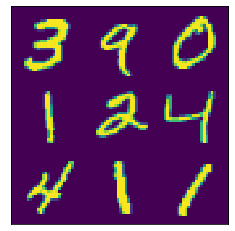

In [4]:
def plot_MNIST_sample(X):
    """
    Plots 9 images in the MNIST dataset.

    Args:
     X (numpy array of floats) : Data matrix each column corresponds to a
                                 different random variable

    Returns:
    Nothing.

    """

    fig, ax = plt.subplots()
    k = 0
    for k1 in range(3):
        for k2 in range(3):
            k = k + 1
            plt.imshow(np.reshape(X[k, :], (28, 28)),
                     extent=[(k1 + 1) * 28, k1 * 28, (k2+1) * 28, k2 * 28],
                     vmin=0, vmax=255)
    plt.xlim((3 * 28, 0))
    plt.ylim((3 * 28, 0))
    plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
    plt.clim([0, 250])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
    

mnist = fetch_openml(name='mnist_784')
X = mnist.data
plot_MNIST_sample(X)

In [85]:
# standardise and normalise the data
stds_X_train = MinMaxScaler().fit_transform(X_train)
stds_X_test =  MinMaxScaler().fit_transform(X_test)
print('done')

done


In [303]:
# perfoming PCA
pca = PCA()
pca.fit(stds_X_train)
PCA_X = pca.transform(stds_X_train)

In [304]:
# function to   display scree plot 
def screeplot(pca):
    fig = plt.subplots(figsize=(11,5))
    variance = np.round(pca.explained_variance_ratio_*100,decimals=1)
    labels = ['PC' + str(x) for x in range(1,len(variance)+1)]
    plt.bar(x=range(1,len(variance)+1),height =variance,tick_label=labels)
    plt.xlabel('PCA')
    plt.ylabel('Percentage of Variance')
    plt.title('Scree Plot')
    plt.show()
    return variance,labels


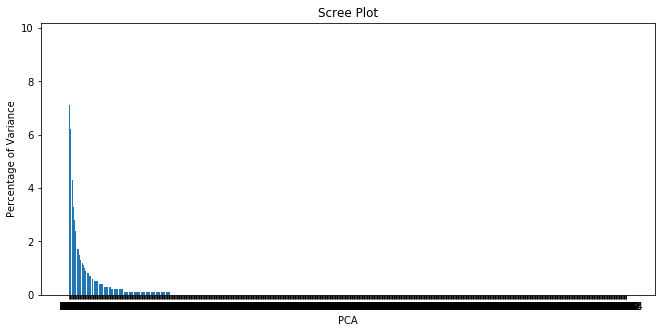

In [305]:
# display scree plot 
var,labels =screeplot(pca)
# for displaying graph 
labels.append('label')

In [306]:

print(var[:300])

[9.7 7.1 6.2 5.4 4.9 4.3 3.3 2.9 2.8 2.4 2.1 2.  1.7 1.7 1.6 1.5 1.3 1.3
 1.2 1.2 1.1 1.  1.  0.9 0.9 0.8 0.8 0.8 0.7 0.7 0.7 0.6 0.6 0.6 0.6 0.5
 0.5 0.5 0.5 0.5 0.5 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

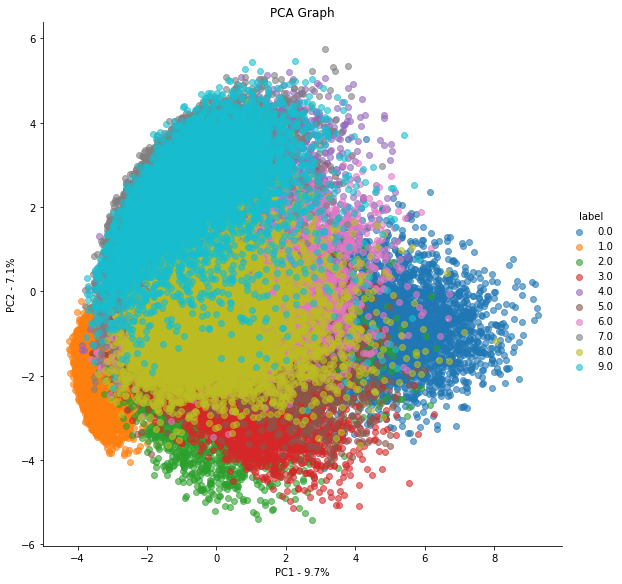

In [307]:
#  plot of the PC1 AND PC2
dataframe =pd.DataFrame(np.vstack((PCA_X.T,Y_train)).T,columns=labels)    
def PC1_andPC2_plot(pca):
    sns.FacetGrid(dataframe,hue='label', height=8).map(plt.scatter,'PC1','PC2',alpha=0.6).add_legend()
    plt.title('PCA Graph')
    plt.xlabel('PC1 - {0}%'.format(var[0]))
    plt.ylabel('PC2 - {0}%'.format(var[1]))
    
PC1_andPC2_plot(PCA_X)        

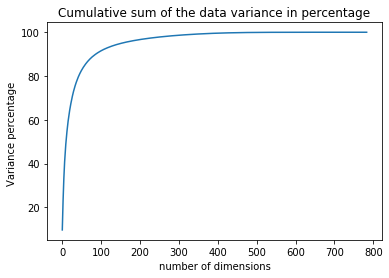

In [308]:
# plot cumulative PCA
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.title('Cumulative sum of the data variance in percentage')
plt.xlabel('number of dimensions')
plt.ylabel('Variance percentage ')
plt.show()

In [309]:
#  Applying k means to our reduced 2d space 
k=10
kmeans= KMeans(n_clusters=k)
clusters_assignments = kmeans.fit_predict(PCA_X[:,:2])
centroid_locations = kmeans.cluster_centers_
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


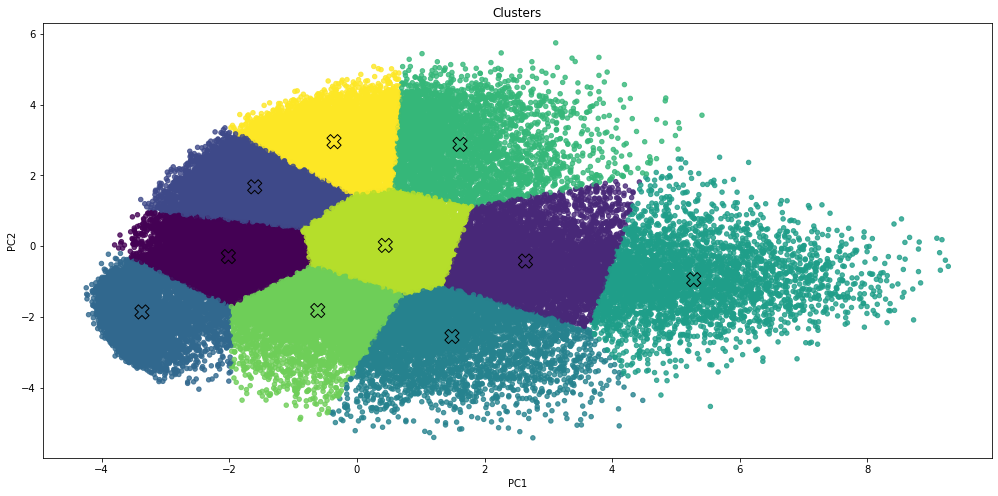

In [310]:

def plot_k_means(X, clusters_assignments, centroid_locations):
    plt.figure(figsize=(17, 8))
    plt.scatter(X[:, 0], X[:, 1], s=20, c=clusters_assignments, alpha=0.8) # plot data points
    plt.scatter(centroid_locations[:, 0], centroid_locations[:, 1], s=200, marker='X',c=range(k), edgecolors='k') # plot centroids
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Clusters')
    plt.show()

plot_k_means(PCA_X[:,:2],clusters_assignments,centroid_locations)


In [311]:

print(kmeans.inertia_)


59002.82583335802


In [312]:
print(silhouette_score(PCA_X[:,:2],kmeans.labels_))

0.34604868660119054


In [313]:
#  label of each centroid , each data point assigned to one 

print(kmeans.labels_)

[8 5 2 ... 8 8 8]


In [314]:
ARI = metrics.adjusted_rand_score(Y_train,kmeans.labels_)
print(ARI)

0.23001482047305538


In [315]:
print(kmeans.labels_[:5])

[8 5 2 3 9]


In [316]:
print(Y_train[:5])

# k_mean labels are randomly assigned  and hence future initialisation can help to tune the k_mean
# test with different parameters and iters to see if there is a change 


[5 0 4 1 9]


In [143]:
#  processing the down sampled  data for NN  and SVM 
stds_X_train_ds = MinMaxScaler().fit_transform(X_train_ds)
stds_X_test_ds = MinMaxScaler().fit_transform(X_test_ds)



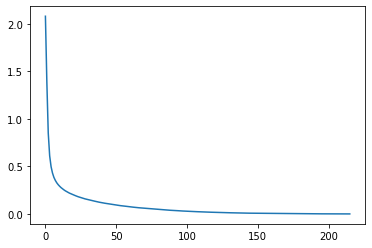

training time: 36.912 s


In [146]:

#  SUPERVISED LEARNING : ANN AND SVM 

# k-cross validation

cl_name = ['Neural Networks', 'SVM']

mlp = MLPClassifier(
                    activation='relu',
                    solver='adam',
                    hidden_layer_sizes=(98,98),
                    learning_rate_init=0.0001,
                    max_iter=1000,
                    n_iter_no_change=25,
                   )
t0 =time.time()
mlp.fit(stds_X_train_ds, Y_train_ds)
plt.plot(mlp.loss_curve_)
plt.show()
t1= time.time()
print("training time:", round(t1-t0, 3), "s") # the time would be round to 3 decimal in seconds
# plot_confusion_matrix(mlp,test_x_orig_stand,test_y_flatten) 

In [43]:
print(stds_X_train_ds.shape)

(30000, 784)


In [147]:
#  initial accuracy of the model 
print('Training accuracy: ',mlp.score(stds_X_train_ds, Y_train_ds))

Training accuracy:  1.0
Testing accuracy : 0.9472


In [149]:
# Now to make sure there is no overfitting lets train the model with CV to tune the parameters  and plot the learning curves 
#  validation curves 

learning_rates = [1e-3,1e-4,1e-5,1e-6]
alphas = [1e-3,1e-4,1e-5]
folds = KFold(n_splits = 10, shuffle = True, random_state = 10)
parameter_space = {'alpha': alphas ,'learning_rate_init': learning_rates }
mlp_1 = MLPClassifier(
                    activation='relu',
                    solver='adam',
                    hidden_layer_sizes=(98,98)
                     )

t0 =time.time()
clf= GridSearchCV(
                 mlp_1,
                 parameter_space,
                 cv=folds,
                 n_jobs=4, 
                 verbose=True,)
clf.fit(stds_X_train_ds,Y_train_ds)
t1= time.time()
print("training time:", round(t1-t0, 3), "s") # the time would be round to 3 decimal in seconds
print(clf.best_params_)



Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 11.8min
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed: 35.5min finished


training time: 2141.68 s
{'alpha': 0.001, 'learning_rate_init': 0.001}


In [112]:
# training an svm 
#  running svm with 5 folds as it takes longer 
folds = KFold(n_splits =5, shuffle=True, random_state= 10)
gammas = np.logspace(-6,-1,5)
C = [1,2,3,4,5,6,7,8,9,10]
parameter_space = [ {'gamma': gammas, 'C': C}]
# specify model
svc_rbf = SVC(kernel="rbf")
svc_linear = SVC(kernel='linear')


model_svc = RandomizedSearchCV(svc_rbf, 
                               parameter_space,  
                               cv =folds,
                               n_jobs=4,
                               verbose=True
                              )      

t0 =time.time()
# fit the model
model_svc.fit(stds_X_train_ds, Y_train_ds)
t1= time.time()
print("training time:", round(t1-t0, 3), "s") # the time would be round to 3 decimal in seconds
print(model_svc.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 41.6min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 52.3min finished


training time: 3174.671 s
{'gamma': 0.005623413251903491, 'C': 10}


In [123]:
#  plotting learning curves of the model used
def plot_learning_curve(model,X,Y,title,n_jobs = 4,cv=None,axes= None, ylim=None,train_sizes = np.linspace(0.1,1.0,5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Accuracy Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(model, X, Y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")
    
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")


    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the  model")

    return plt

title_nn = "Learning curve Neural Networks, alpha :{0} learning_rate_init: {1}".format(clf.best_params_['alpha'],clf.best_params_['learning_rate_init'])
title_svmrbf = 'Learning curve RBF SVM, gamma :{0}, C :{1} '.format(model_svc.best_params_['gamma'],model_svc.best_params_['C'])






/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

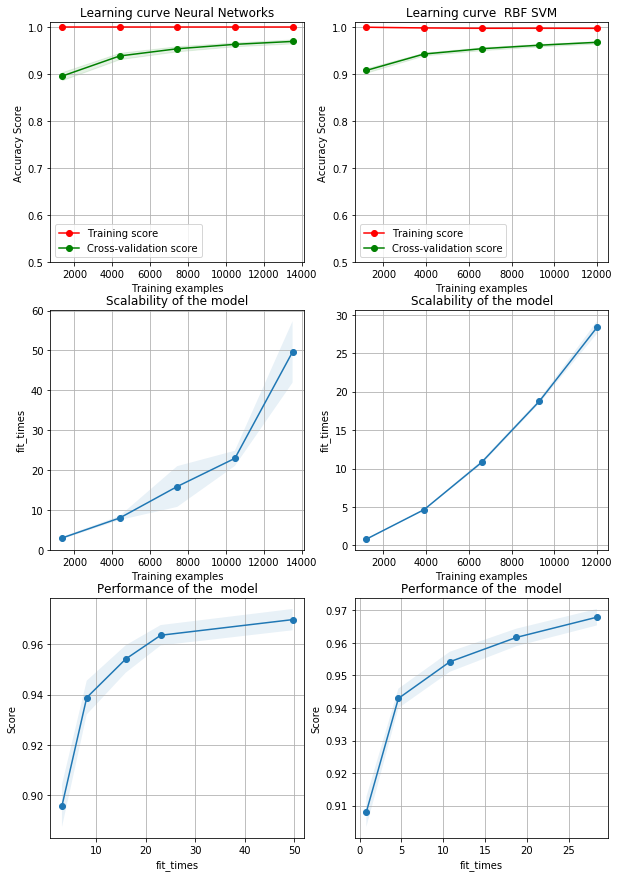

In [125]:
#Neural network  and SVM model learning  curves

clf_nn = MLPClassifier(
                       activation='relu',
                       solver='sgd',
                       hidden_layer_sizes=(176,176,176),
                       learning_rate_init = clf.best_params_['learning_rate_init'],
                       alpha = clf.best_params_['alpha']
                      )

clf_rbfsvm = SVC(
                kernel='rbf',
                gamma =model_svc.best_params_['gamma'],
                C = model_svc.best_params_['C']
                )

cv_nn = KFold(n_splits = 5, shuffle = True, random_state = 10)

# Reduce fold split to allow svm to train faster 
cv_svm = KFold(n_splits = 5, shuffle = True, random_state = 10)

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

plot_learning_curve(clf_nn,stds_X_train_ds,Y_train_ds,title_nn,cv=cv_nn,axes=axes[:,0],ylim=(0.5,1.01))

plot_learning_curve(clf_rbfsvm,stds_X_train_ds,Y_train_ds,title_,cv=cv_svm,axes=axes[:,1],ylim=(0.5,1.01))

In [150]:
print('Training accuracy: ',clf.score(stds_X_train_ds, Y_train_ds))

Training accuracy:  1.0


In [156]:
#Validation curve for hyper parameter tuning

cv_nn = KFold(n_splits = 5, shuffle = True, random_state = 10)

def plot_validation_curve(model,X,Y,title,n_jobs =5,param_name='learning_rate_init',cv=cv_nn):
    parameter_space = np.logspace(-6,-1,100)
    train_scores , valid_scores = validation_curve(model,
                                               X,
                                               Y,
                                               param_name=param_name,
                                               param_range= parameter_space,
                                               scoring='accuracy',
                                               n_jobs=n_jobs,
                                               cv =cv,
                                               verbose = 3    
                                              )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(valid_scores, axis=1)
    test_scores_std = np.std(valid_scores, axis=1)

    plt.title(title)
    plt.xlabel(r"$\Learning Rate$")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()




In [157]:
#  validation curve on learning rate 
val_nn = MLPClassifier(
                       activation='relu',
                       solver='adam',
                       hidden_layer_sizes=(98,98)
                      )
title = 'Validation curve ANNs : effect of learning rate '
plot_validation_curve(val_nn,stds_X_train_ds,Y_train_ds,title)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 167 out of 500 | elapsed: 33.3min remaining: 66.5min
[Parallel(n_jobs=5)]: Done 334 out of 500 | elapsed: 64.2min remaining: 31.9min
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed: 90.4min finished


NameError: name 'test_scores' is not defined

In [165]:

val_nn = MLPClassifier(
                       activation='relu',
                       solver='adam',
                       hidden_layer_sizes=(98,98)
                      )

def plot_learning_curve_MSE(model,X,Y):
    X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size = 0.2)
    train_errors , val_errors = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],Y_train[:m])
        Y_train_pred = model.predict(X_train[:m])
        Y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(Y_train[:m],Y_train_pred))
        val_errors.append(mean_squared_error(Y_val,Y_val_pred))
    plt.plot(np.sqrt(train_errors), 'r-+',linewidth =2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth =3 , label='validation')
    plt.xlabel('Training data')
    plt.ylabel('RMSE')
    plt.show()


In [ ]:
clf_t = MLPClassifier(
                       activation='relu',
                       solver='adam',
                       hidden_layer_sizes=(98,98,98),
                       learning_rate_init = clf.best_params_['learning_rate_init'],
                       alpha = clf.best_params_['alpha']
                      )

plot_learning_curve_MSE(clf_t,stds_X_train_ds,Y_train_ds)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
import pymc3 as pm

In [ ]:
# BAYESIAN LINEAR REGRESSION USING PYMC3 TO ANALYSE THE CALIFORNIA HOUSING DATA SET
print('hi')

In [ ]:

#  displaying data 

X = pd.DataFrame(california_housing.data, columns=cal_housing.feature_names)
Y = cal_housing.target

